# Plot for Covid19 Test Positivity percent for different India States

Covid19 Tests are dataset provided by Covid19india.org. These Indian states are affected of SARS Covid-19 (aka Corona virus) outbreak. The dataset consist of states and datewise values of total tests, positive, etc
.
This script fetches the online datasets and parses through them for the required states and plot them in simple plots with markers.
The plot in the end shows cumulative Positivity percent with time of some states based on date (more states and UTs can be added and subtracted from that list). 

Positivity percent = (total positive / total no. of tests conducted) x 100

Datasets can be found here: https://api.covid19india.org/csv/. Their official github page is: https://github.com/covid19india/covid19india-react

Note: State/UTs name being used in code is compulsorily same as in datasets' column 'State'

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter

### Import and Load Datasets
#### Tests State-wise
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Tests Datewise for States
 *'statewise_tested_numbers_data.csv'*

In [ ]:
# Getting the dataset
df = pd.read_csv('https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv')
df

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Corona Enquiry Calls,Num Calls State Helpline,Source1,Unnamed: 20,Source2,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210.0,181.0,NaN,NaN,NaN,...,NaN,NaN,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,NaN,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,NaN,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,NaN,340.0,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,114.0,397000.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,NaN,471.0,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,202.0,397000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,26/05/2020,West Bengal,157277.0,Tested,4009.0,NaN,NaN,NaN,18146.0,Government,...,NaN,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,https://t.me/indiacovid/5581,2.55%,1.62,1623.0,39.0,96906000.0
1595,27/05/2020,West Bengal,166513.0,Tested,4192.0,NaN,NaN,NaN,18121.0,Government,...,NaN,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,NaN,2.52%,1.72,1718.0,40.0,96906000.0
1596,28/05/2020,West Bengal,175769.0,Tested,4536.0,NaN,NaN,NaN,17421.0,Government,...,NaN,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,https://t.me/indiacovid/5740,2.58%,1.81,1814.0,39.0,96906000.0
1597,29/05/2020,West Bengal,185051.0,Tested,4813.0,NaN,NaN,NaN,16502.0,Government,...,NaN,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,NaN,https://t.me/indiacovid/5836,2.60%,1.91,1910.0,38.0,96906000.0


In [ ]:
# Filtering the required columns
df1 = df[['Updated On','State', 'Total Tested', 'Positive']]
df1

,Updated On,State,Total Tested,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403.0,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,33.0
...,...,...,...,...
1594,26/05/2020,West Bengal,157277.0,4009.0
1595,27/05/2020,West Bengal,166513.0,4192.0
1596,28/05/2020,West Bengal,175769.0,4536.0
1597,29/05/2020,West Bengal,185051.0,4813.0


In [ ]:
# Removing the rows with Nan values
df1 = df1.dropna()
df1

,Updated On,State,Total Tested,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403.0,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,33.0
...,...,...,...,...
1594,26/05/2020,West Bengal,157277.0,4009.0
1595,27/05/2020,West Bengal,166513.0,4192.0
1596,28/05/2020,West Bengal,175769.0,4536.0
1597,29/05/2020,West Bengal,185051.0,4813.0


### Function for Parsing Data

The tests dataset consist of all states, so we need to separate them as required. 

#### FetchState Function

*Params*: State Name 

*Returns*: Single dataframe of State's datewise cumulative tests value, with the test positivity percent.

We have sliced the data of 17th April and before.
Checkout the example for 'Madhya Pradesh' state.

In [ ]:
# Function takes in a state and return it's dataframe with positivity rate(positve/total tests) in percent, begining from 17th April 2020 
def fetchState(State):
    
    Statedf = df1.loc[df1['State'] == State].copy()
    Statedf.loc[:, 'Test Positivity percent'] = (Statedf.loc[:, 'Positive']/ Statedf.loc[:, 'Total Tested'])*100
    
    Statedf.loc[:,'Updated On'] = pd.to_datetime(Statedf.loc[:,'Updated On'], format = '%d/%m/%Y')
    Statedf = Statedf[Statedf['Updated On'] >= datetime.strptime('15/04/2020' , '%d/%m/%Y')]

    return Statedf

In [ ]:
MP  = fetchState('Madhya Pradesh')
MP.head()

,Updated On,State,Total Tested,Positive,Test Positivity percent
847,2020-04-15,Madhya Pradesh,9596.0,938.0,9.774906
848,2020-04-16,Madhya Pradesh,13492.0,1164.0,8.627335
849,2020-04-17,Madhya Pradesh,15302.0,1310.0,8.560972
850,2020-04-18,Madhya Pradesh,14978.0,1402.0,9.360395
851,2020-04-19,Madhya Pradesh,17835.0,1407.0,7.888982


### Function for plotting the graph

*Params*: List of States (Number of States should be a multiple of 3)

*Returns*: None

Function plot subplots showing each state data (x-axis: Dates, y-axis: Positivity percent). 
Final plot is also saved in the same directory as 'png' file.

In [ ]:
# Function takes in list of states and plots them individally in 3 columns

def PlotStatesTestPositivity(loc):

    noc = len(loc)
    nor = math.ceil(noc/3)
    
    fig, axes = plt.subplots(nrows = nor, ncols = 3, figsize = (25,25))
    fig.suptitle('Ratio of Positive cases to Tested cases (in %) in selected states as of ' + df1.iloc[-1,0] , fontsize = 22, y= 0.94)
    plt.subplots_adjust(hspace = .4)
    
    k = 0
    for i in range(nor):
        for j in range(3):
            if k < noc:
                StateData = fetchState(loc[k])
                
                axes[i,j].plot(StateData['Updated On'], StateData['Test Positivity percent'], mfc = 'orange', marker='o', markersize = 10, linestyle = 'None')
                
                axes[i,j].set_title(loc[k] +'\n Total Tests: ' + str(int(StateData.iloc[-1,2])) + ', Total Positive: ' + str(int(StateData.iloc[-1,3])), y = 1, fontsize = 15)
                
                axes[i,j].grid(axis = 'y', alpha = 0.5)
                
                axes[i,j].get_yaxis().set_tick_params(which='minor', size=0)
                axes[i,j].get_yaxis().set_tick_params(which='minor', width=0)
    
                myFmt = DateFormatter("%d-%b")
                axes[i,j].xaxis.set_major_formatter(myFmt)
                axes[i,j].xaxis.set_major_locator(plt.MaxNLocator(7))
                
                axes[i,j].spines['top'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                
                k = k + 1
    
    plt.savefig('TestPositivity.png')
    
# --- Function Ends Here ---


List of states has been made to pass in the function for plotting. One can add more states and UTs to it (or reduce).

In [ ]:
list_of_states = ['Maharashtra', 'Kerala', 'Uttar Pradesh', 
                  'Delhi', 'West Bengal', 'Karnataka',
                  'Gujarat', 'Haryana', 'Madhya Pradesh',
                  'Bihar', 'Rajasthan', 'Andhra Pradesh',
                  'Tamil Nadu', 'Jammu and Kashmir', 'Assam']

### Finally the Plot

The plot also shows total positive and total tests done till date. Also check image of the plot, saved in your system.

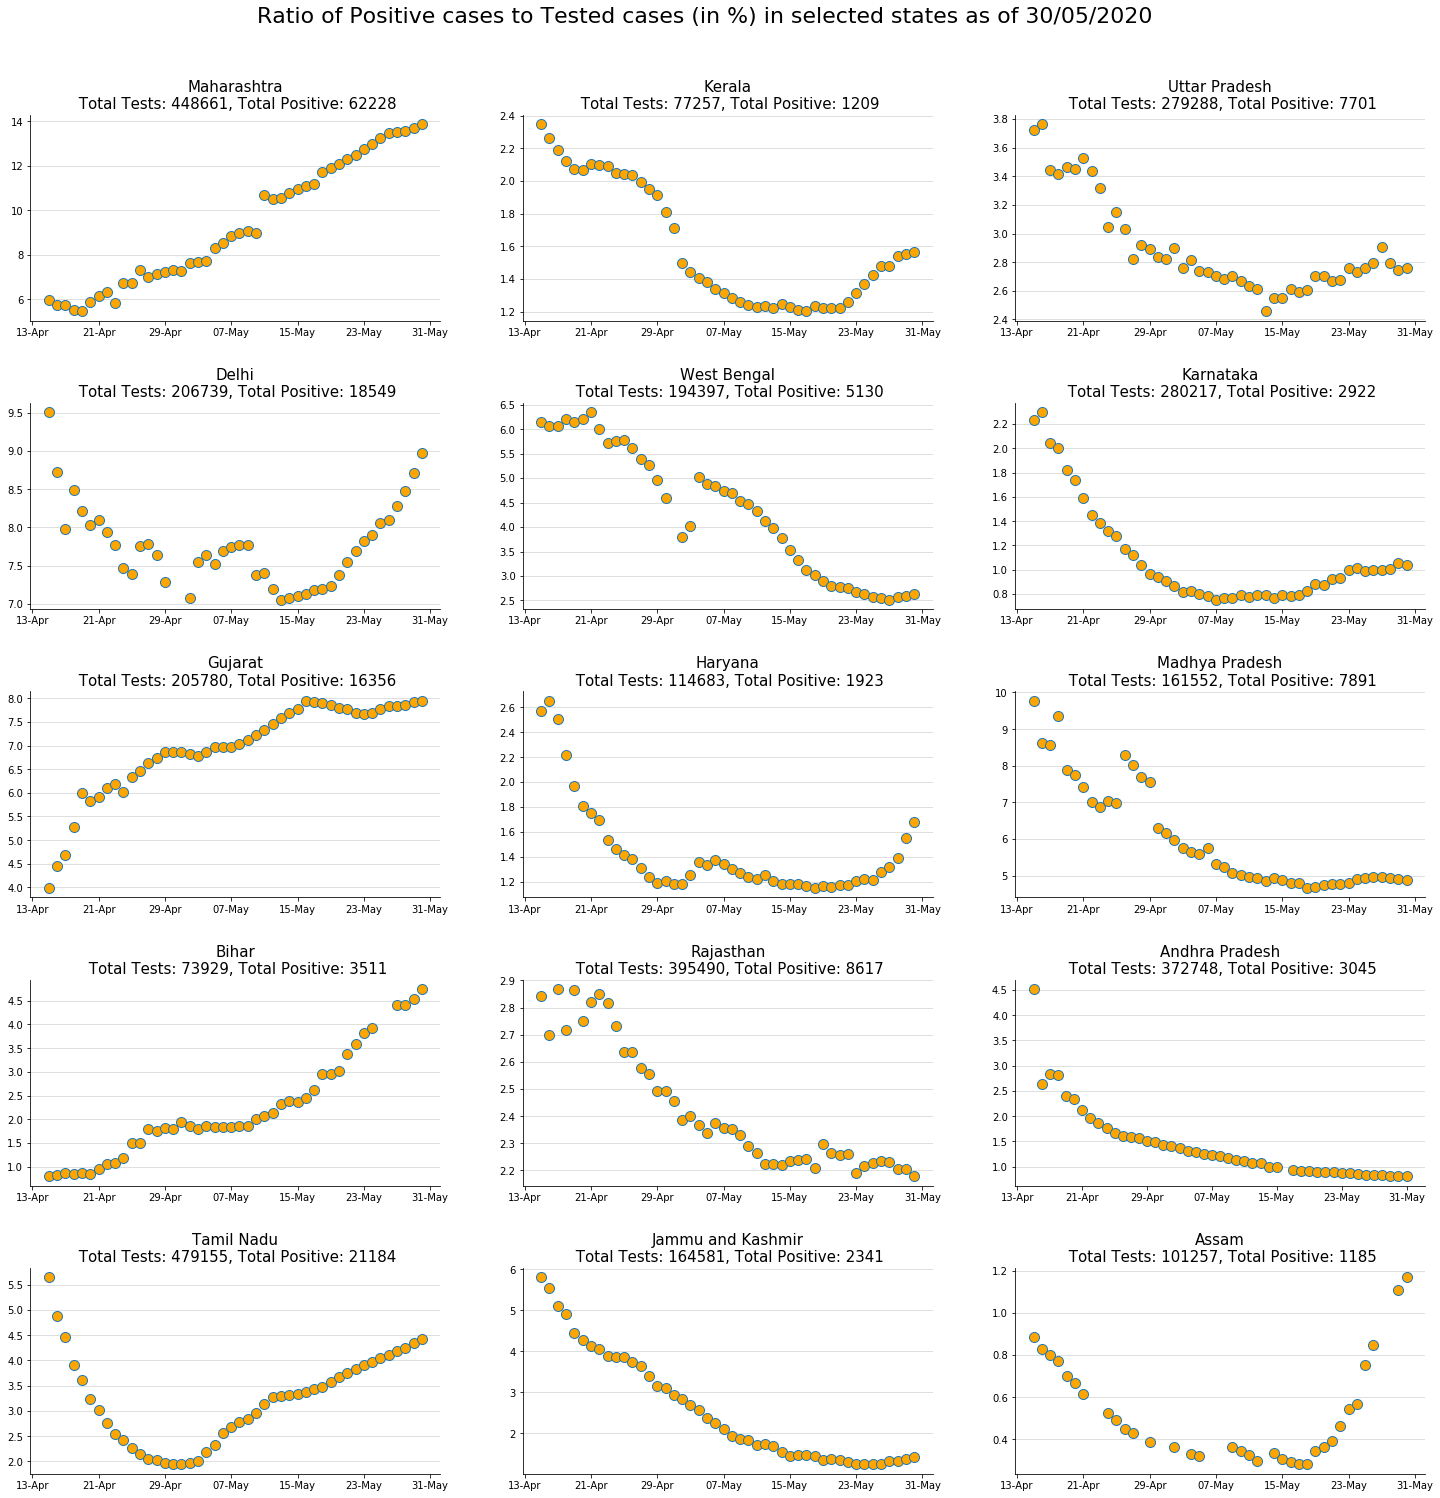

In [ ]:
PlotStatesTestPositivity(list_of_states)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d20f0b1-a95e-4774-951b-ce52162787ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>